<a href="https://colab.research.google.com/github/mark-narusov/kaggle_leopard_challenge/blob/main/kaggle_smoking_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

Задача — предсказать, курит человек или нет, по его клиническим показаниям. Соответственно, перед нами задача обучения с учителем, а именно — бинарной классификации.



Целевая метрика [этого соревнования](https://www.kaggle.com/competitions/leopard-challenge-classification/overview) — *F1* — зависит от порога классификации. По советам Глеба в курсе [Data Science с Глебом Михайловым](https://stepik.org/course/113596/syllabus) я сначала подбирал модели по метрике *ROC-AUC*, отражающаю качество модели по всем возможным порогам, и только потом побирал оптимальный порог классификации. И модель, и порог я находил на кросс-валидации с пятью фолдами.

Только с *CatBoost*-ом и интерпретируемыми фичами я дошёл до скора в **0.455**, третье место на лидерборде. Чтобы вырваться в топ-один я усилил модель и сблендил с ней вероятностные предсказания случайного леса, натренированном на $100$+ относительно сильных интерактивных фичах (*interaction features*). По ходу обнаружил, что такой случайный лес выдаёт результат лучше на тестовой выборке, поэтому в конечной модели отдавал бОльший вес предсказаниям случайного леса, однако оставлял возможность классифицировать в пользу *CatBoost* если последний вдвое "более уверен".  

В итоге мне удалось добиться скора **0.479** и закрепиться на первом месте.

# Содержание

>[Введение](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=V8ZfEszyDMrj)

>[Импортирование библиотек](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=fEDJ02uvCIlZ)

>[Знакомимся с данными](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=1ZIRmCA3cQ8Q)

>[Анализ и создание признаков](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=9RxSqiqaG_Q5)

>>[Холестерин, HDL и LDL](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=H1Yx1rN4E3sR)

>>[Mean Arterial Pressure](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=gyrtJafGkLgG)

>>[Dental Health](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=eBDrpBN2mJ21)

>>[Waist-to-Height Ratio](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=9iNF_8bNndW6)

>>[Зрение и слух](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=tNQi5ZcPq1Lh)

>>[Возраст](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=apaWPKqRsLfv)

>>[Вес, индекс массы тела](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=BXvI5X3PtmlK)

>>[Показатели работы печени](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=6Jz3loc53BdT)

>>[Логарифмирование](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=shbf8yM1z02P)

>>[Binning](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=9nEOxQV1y_sX)

>>[Удаляем ненужное](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=QydIxxaBHF9g)

>>[Итог преобразования](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=2es7urQc5oeR)

>[Предобработка для ML](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=4t-v0VmH5xnv)

>>[Предобработка для случайного леса](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=LSSGbBEKR8jy)

>>>[Масштабирование](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=n1zVopCSGIE-)

>>>[Interaction Features](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=8Ooj3gujGubj)

>>>[Выбор признаков](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=OLX3ThaMIJAx)

>>>[OHE-Кодирование категориальных признаков](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=GgKXTafMJoN9)

>[Оптимизация CatBoost-а](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=atJabIfEF2Gi)

>>[Подбор гиперпараметров](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=0ZyMa3gHPoNb)

>>[Подбор оптимального порога](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=f6G_3Dk1Pg-Y)

>[Оптимизация случайного леса](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=b8EEieJ6M02F)

>>[Подбор гиперпараметров](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=w5ATpGITM02U)

>>[Подбор оптимального порога](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=0MkGulP7M02V)

>[Блендинг двух моделей](#folderId=1BcJ_ObSwBJvLD2oWyW-kDdL4rRzrdvHh&updateTitle=true&scrollTo=LAUWkuSOBJY2)


# Импортирование библиотек

In [1]:
import numpy as np
import pandas as pd

from typing import Union

from tqdm import tqdm

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 20

!pip install phik ydata_profiling catboost optuna

import phik
from phik.report import plot_correlation_matrix

from sklearn.model_selection import (train_test_split,
                                     StratifiedKFold,
                                     cross_val_score)
from sklearn.preprocessing import (OneHotEncoder,
                                   StandardScaler,
                                   PolynomialFeatures)
from sklearn.metrics import (roc_auc_score,
                             f1_score)
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier, cv
from catboost.utils import Pool

import optuna
from optuna.visualization \
import (plot_optimization_history,
        plot_param_importances)
from optuna.pruners import HyperbandPruner

# Знакомимся с данными

In [2]:
df = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
df.nunique()[df.nunique() == 1]

oral    1
dtype: int64

Есть колонка с константой, удаляем:

In [4]:
df = df.drop('oral', axis='columns')
test = test.drop('oral', axis='columns')

In [5]:
df.columns

Index(['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'tartar', 'smoking'],
      dtype='object')

Приводим колонки к *snake_case*:

In [6]:
df.columns = df.columns.str.lower()
test.columns = test.columns.str.lower()

In [7]:
df.columns = [
    col.replace('(', '_').replace(')', '').replace(' ', '_')
    for col in df.columns
]
test.columns = [
    col.replace('(', '_').replace(')', '').replace(' ', '_')
    for col in test.columns
]

Форматируем бинарную колонку:

In [8]:
df['tartar'].sample(5)

4077    N
2557    Y
9897    Y
3930    Y
689     N
Name: tartar, dtype: object

In [9]:
df.tartar = (df.tartar == 'Y').astype('int')
test.tartar = (test.tartar == 'Y').astype('int')

Создадим функцию для аппроксимации полезности фичей через корреляцию *phik*:

In [10]:
def evaluate_features(arr: list) -> pd.DataFrame:
    '''
    Функция принимает на вход список предикторов,
    отдаёт датафрейм, где в ячейках — коэффициент
    корреляции phik с целевой переменной 'churned'
    '''
    table = df[arr + ['smoking']]\
    .phik_matrix()['smoking'].to_frame()\
    .sort_values('smoking', ascending=False).round(2)
    return table.iloc[1:, :]

# Анализ и создание признаков

Так как я генерирую фичи для соревнования, а не для продакшна, то собственно метрика *Recall* в этом занятии для меня важнее чем *Precision* — даже когда признак скорее всего не будет полезен я не удалял его — *CatBoost* разберётся.

Доля курящих в датасете:

In [11]:
df.smoking.mean().round(4)

0.202

## Холестерин, *HDL* и *LDL*

In [12]:
evaluate_features(['cholesterol', 'hdl', 'ldl'])

interval columns not set, guessing: ['cholesterol', 'hdl', 'ldl', 'smoking']


,smoking
hdl,0.05
ldl,0.02
cholesterol,0.02


Создаю три признака на основе отношений этих трёх величин.
1. `chol_hdl`: отношение общего холестерина к *HDL*
2. `ldl_hdl`: отношение *LDL* к *HDL*
3. `chol_hdl_cat`: разбиваю первый на три примерные клинические категории

In [13]:
df['chol_hdl'] = df['cholesterol'] / df['hdl']
df['ldl_hdl'] = df['ldl'] / df['hdl']
df['chol_hdl_cat'] = df['chol_hdl'].apply(lambda x:
                                          'good' if x < 3.5
                                          else 'okay' if x < 5
                                          else 'bad')


In [14]:
evaluate_features(['cholesterol', 'hdl', 'ldl',
                   'chol_hdl', 'ldl_hdl', 'chol_hdl_cat'])

interval columns not set, guessing: ['cholesterol', 'hdl', 'ldl', 'chol_hdl', 'ldl_hdl', 'smoking']


,smoking
hdl,0.05
chol_hdl_cat,0.03
ldl,0.02
chol_hdl,0.02
ldl_hdl,0.02
cholesterol,0.02


In [15]:
df.groupby('chol_hdl_cat')['smoking'].agg(['count', 'mean'])

,count,mean
chol_hdl_cat,,
bad,1660,0.256627
good,6111,0.187858
okay,6092,0.201248


Получилось умеренно информативно, добавляю новые признаки в тестовую выборку:

In [16]:
test['chol_hdl'] = test['cholesterol'] / test['hdl']
test['ldl_hdl'] = test['ldl'] / test['hdl']
test['chol_hdl_cat'] = test['chol_hdl'].apply(lambda x:
                                         'good' if x < 3.5
                                         else 'okay' if x < 5
                                         else 'bad')

## *Mean Arterial Pressure*

На врачебном сайте раздобыл такую формулу для *Mean Arterial Pressure*, позволяющее оценивать систолистеское и дистолическое давление в одной метрике:

$MAP$ = $(systolic$ $blood$ $pressure + (2 * diastolic$ $blood$ $pressure))$ / $3$

In [17]:
evaluate_features(['systolic', 'relaxation'])

interval columns not set, guessing: ['systolic', 'relaxation', 'smoking']


,smoking
relaxation,0.02
systolic,0.02


In [18]:
df['map'] = (df['systolic'] + (2 * df['relaxation'])) / 3
df['map_cat'] = \
df.apply(lambda x: 'norm' if x['map'] < 90
                else 'elevated',
        axis='columns')

In [19]:
evaluate_features(['systolic', 'relaxation', 'map_cat', 'map'])

interval columns not set, guessing: ['systolic', 'relaxation', 'map', 'smoking']


,smoking
map_cat,0.02
relaxation,0.02
systolic,0.02
map,0.02


Добавляю в тестовую выборку:

In [20]:
test['map'] = (test['systolic'] + (2 * test['relaxation'])) / 3
test['map_cat'] = \
test.apply(lambda x: 'norm' if x['map'] < 90
                else 'elevated',
        axis='columns')

## *Dental Health*

Комбинирую две бинарные метрики про здоровье зубов — *tartar* и *dental_caries*:

In [21]:
evaluate_features(['dental_caries', 'tartar'])

interval columns not set, guessing: ['dental_caries', 'tartar', 'smoking']


,smoking
tartar,0.10
dental_caries,0.09


In [22]:
df['dental_health'] = df.apply(
    lambda x: 'good'
    if not x['tartar'] and not x['dental_caries']
    else 'okay' if (not x['tartar'] and x['dental_caries'])
                     or (x['tartar'] and not x['dental_caries'])
    else 'bad',
    axis='columns')

In [23]:
df.groupby('dental_health')['smoking']\
.agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
dental_health,,
bad,2114,0.257332
okay,6229,0.215444
good,5520,0.165580


In [24]:
evaluate_features(['dental_health', 'tartar', 'dental_caries'])

interval columns not set, guessing: ['tartar', 'dental_caries', 'smoking']


,smoking
tartar,0.10
dental_caries,0.09
dental_health,0.05


In [25]:
test['dental_health'] = test.apply(
    lambda x: 'good'
    if not x['tartar'] and not x['dental_caries']
    else 'okay' if (not x['tartar'] and x['dental_caries'])
                     or (x['tartar'] and not x['dental_caries'])
    else 'bad',
    axis='columns')

## *Waist-to-Height Ratio*

Поделил окружность талии на высоту, ещё добавил клинические категории. Для мужчин и женщин они немного отличаются, поэтому усреднил.

In [26]:
evaluate_features(['waist_cm', 'height_cm'])

interval columns not set, guessing: ['waist_cm', 'height_cm', 'smoking']


,smoking
waist_cm,0.06
height_cm,0.04


In [27]:
df['wh_ratio'] = df['waist_cm'] / df['height_cm']
df['wh_cat'] = \
df['wh_ratio'].apply(
    lambda x:
    'extr_slim' if x < 0.43
    else 'slim_healthy' if x < 0.46
    else 'healthy' if x < 0.51
    else 'overweight' if x < 0.56
    else 'obese'
)

In [28]:
df.groupby('wh_cat')['smoking']\
.agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
wh_cat,,
extr_slim,885,0.224859
obese,1571,0.212603
slim_healthy,1880,0.209574
overweight,3967,0.205445
healthy,5560,0.190288


In [29]:
evaluate_features(['waist_cm', 'height_cm', 'wh_ratio', 'wh_cat'])

interval columns not set, guessing: ['waist_cm', 'height_cm', 'wh_ratio', 'smoking']


,smoking
waist_cm,0.06
height_cm,0.04
wh_ratio,0.03
wh_cat,0.02


In [30]:
test['wh_ratio'] = test['waist_cm'] / test['height_cm']
test['wh_cat'] = \
test['wh_ratio'].apply(
    lambda x:
    'extr_slim' if x < 0.43
    else 'slim_healthy' if x < 0.46
    else 'healthy' if x < 0.51
    else 'overweight' if x < 0.56
    else 'obese')

## Зрение и слух

Логично, что стоит объединить данные по левому и правому уху, а также левому и правому глазу.

In [31]:
df['hearing_mean'] = (df['hearing_left'] + df['hearing_right']) / 2
df['eyesight_mean'] = (df['eyesight_left'] + df['eyesight_right']) / 2

In [32]:
evaluate_features(['hearing_mean', 'eyesight_mean',
                   'eyesight_right', 'eyesight_left',
                   'hearing_left', 'hearing_right'])

interval columns not set, guessing: ['hearing_mean', 'eyesight_mean', 'eyesight_right', 'eyesight_left', 'hearing_left', 'hearing_right', 'smoking']


,smoking
hearing_left,0.04
hearing_right,0.02
hearing_mean,0.01
eyesight_mean,0.01
eyesight_right,0.00
eyesight_left,0.00


In [33]:
test['hearing_mean'] = (test['hearing_left'] + test['hearing_right']) / 2
test['eyesight_mean'] = (test['eyesight_left'] + test['eyesight_right']) / 2

## Возраст

In [34]:
evaluate_features(['age'])

interval columns not set, guessing: ['age', 'smoking']


,smoking
age,0.18


In [35]:
df.groupby('age')['smoking'].agg(['count', 'mean'])

,count,mean
age,,
20,654,0.171254
25,1558,0.165597
30,1711,0.163647
35,1765,0.171671
40,2662,0.276108
45,1235,0.273684
50,995,0.257286
55,988,0.210526
60,1369,0.168736


Хоть алгоритм градиентного бустинга и может восстанавливать нелинейные связи самостоятельно, можно ему в этом помочь поделив непрерывный признак на информативные "корзины" (*bins*)

In [36]:
df['middle_aged'] = (df['age'] >= 40) & (df['age'] <= 55)
df['senior'] = df['age'] >= 65

In [37]:
evaluate_features(['middle_aged', 'senior', 'age'])

interval columns not set, guessing: ['age', 'smoking']


,smoking
middle_aged,0.20
age,0.18
senior,0.12


In [38]:
test['middle_aged'] = (test['age'] >= 40) & (test['age'] <= 55)
test['senior'] = test['age'] >= 65

## Вес, индекс массы тела

In [39]:
evaluate_features(['weight_kg'])

interval columns not set, guessing: ['weight_kg', 'smoking']


,smoking
weight_kg,0.04


In [40]:
df.groupby('weight_kg')['smoking'].agg(['count', 'mean'])

,count,mean
weight_kg,,
40,5,0.200000
45,60,0.200000
50,282,0.297872
55,840,0.203571
60,1754,0.185291
65,2549,0.205571
70,2662,0.185950
75,2212,0.188517
80,1481,0.206617


In [41]:
df['normal_weight'] = (df['weight_kg'] >= 55) & (df['weight_kg'] <= 80)

In [42]:
evaluate_features(['weight_kg', 'normal_weight'])

interval columns not set, guessing: ['weight_kg', 'smoking']


,smoking
normal_weight,0.06
weight_kg,0.04


In [43]:
test['normal_weight'] = (test['weight_kg'] >= 55) & (test['weight_kg'] <= 80)

Считаю индекс массы тела (*BMI*) по формуле

$BMI = weight / height^2$

Создаю ещё один признак по клиническим категориям:

In [44]:
df['bmi'] = df['weight_kg'] / ((df['height_cm'] * 0.01) ** 2)
df['bmi_cat'] = df.bmi.apply(lambda x: 'underweight' if x < 18.5
                             else 'healthy' if x >= 18.5 and x < 25
                             else 'overweight' if x >= 25 and x < 30
                             else 'obese')

In [45]:
evaluate_features(['weight_kg', 'normal_weight', 'bmi', 'bmi_cat'])

interval columns not set, guessing: ['weight_kg', 'bmi', 'smoking']


,smoking
bmi,0.07
normal_weight,0.06
bmi_cat,0.05
weight_kg,0.04


In [46]:
test['bmi'] = test['weight_kg'] / ((test['height_cm'] * 0.01) ** 2)
test['bmi_cat'] = test.bmi.apply(lambda x: 'underweight' if x < 18.5
                             else 'healthy' if x >= 18.5 and x < 25
                             else 'overweight' if x >= 25 and x < 30
                             else 'obese')

## Показатели работы печени

Отношение АСТ к АЛТ называется [Коэффициентом де Ритиса](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5_%D0%A0%D0%B8%D1%82%D0%B8%D1%81%D0%B0).

In [47]:
evaluate_features(['ast', 'alt'])

interval columns not set, guessing: ['ast', 'alt', 'smoking']


,smoking
alt,0.01
ast,0.00


In [48]:
df['ast_alt'] = df['ast'] / df['alt']

In [49]:
evaluate_features(['ast', 'alt', 'ast_alt'])

interval columns not set, guessing: ['ast', 'alt', 'ast_alt', 'smoking']


,smoking
ast_alt,0.03
alt,0.01
ast,0.00


In [50]:
test['ast_alt'] = test['ast'] / test['alt']

## Логарифмирование

Хоть деревянным моделям и не важно распределение непрерывных величин, я решил перестраховаться и логарифмировать некоторые величины для преобразования в нормально распределённые.  

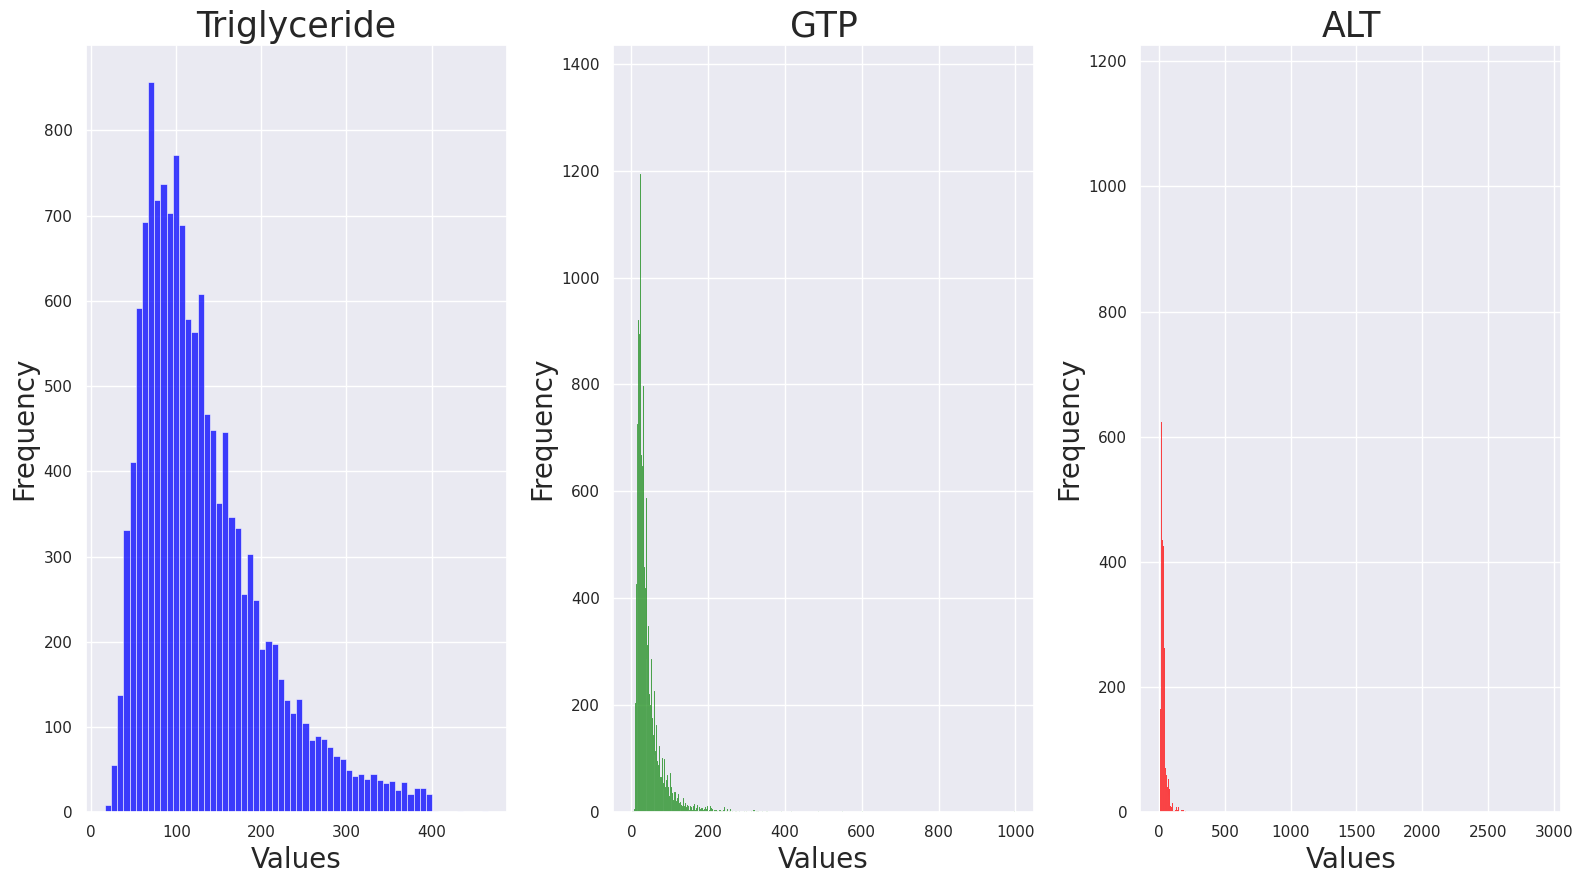

In [51]:
plt.subplot(131)
sns.histplot(df['triglyceride'], color='blue')
plt.title('Triglyceride')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(132)
sns.histplot(df['gtp'], color='green')
plt.title('GTP')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(133)
sns.histplot(df['alt'], color='red')
plt.title('ALT')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()


In [52]:
df['log_tr'] = df.triglyceride.apply(np.log)
df['log_gtp'] = df.gtp.apply(np.log)
df['log_log_alt'] = np.log(np.log(df.alt))

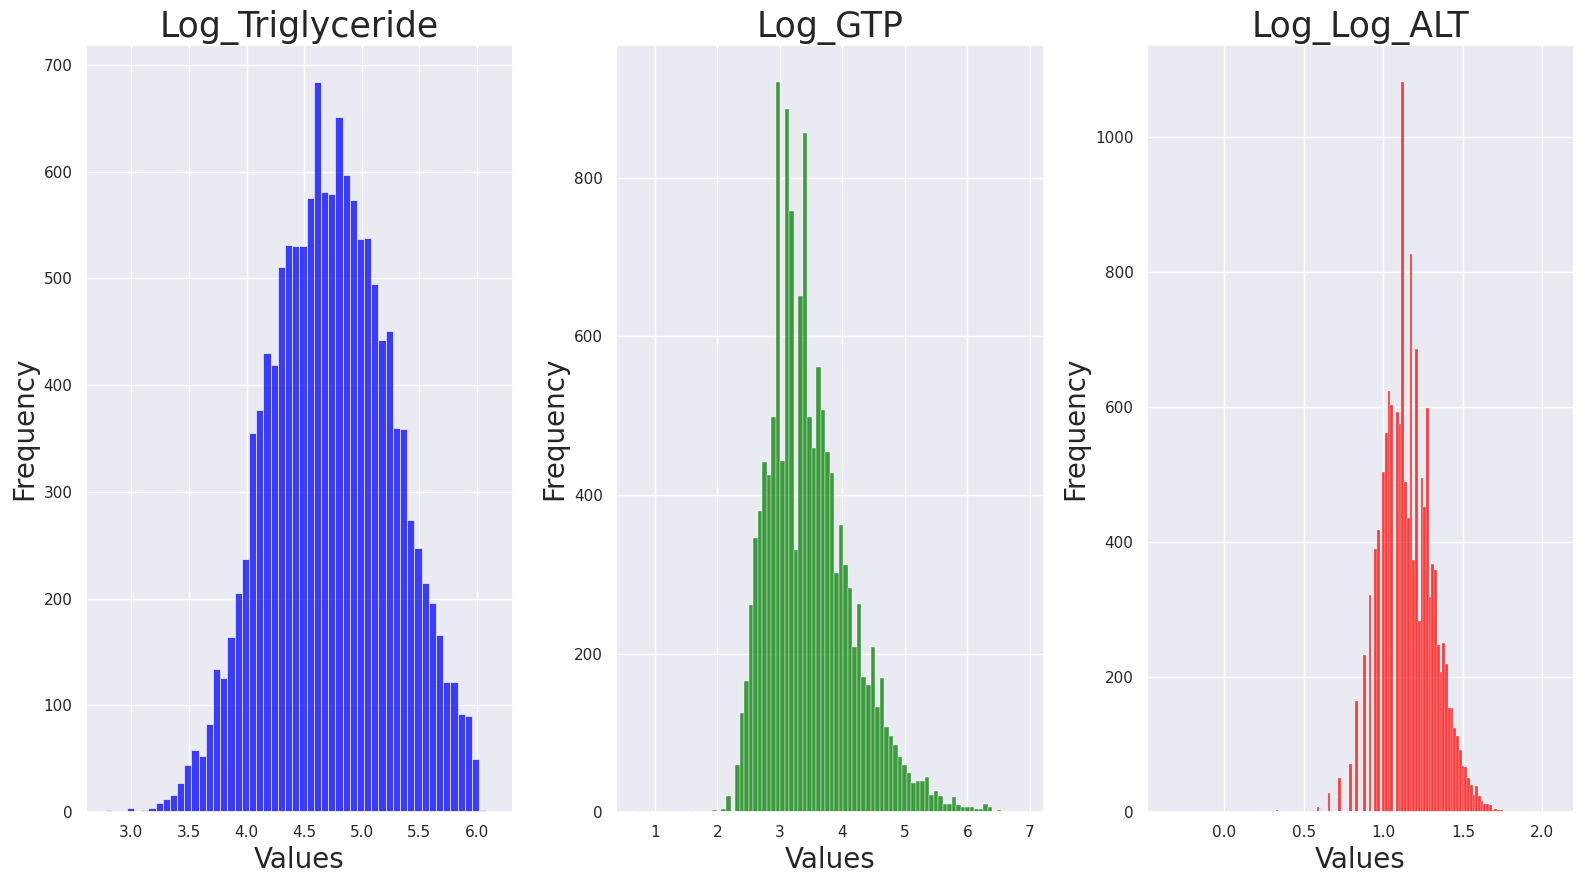

In [53]:
plt.subplot(131)
sns.histplot(df['log_tr'], color='blue')
plt.title('Log_Triglyceride')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(132)
sns.histplot(df['log_gtp'], color='green')
plt.title('Log_GTP')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(133)
sns.histplot(df['log_log_alt'], color='red')
plt.title('Log_Log_ALT')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

In [54]:
evaluate_features(['triglyceride', 'gtp', 'alt',
                   'log_tr', 'log_gtp', 'log_log_alt'])

interval columns not set, guessing: ['triglyceride', 'gtp', 'alt', 'log_tr', 'log_gtp', 'log_log_alt', 'smoking']


,smoking
log_gtp,0.23
log_tr,0.19
triglyceride,0.19
gtp,0.14
log_log_alt,0.02
alt,0.01


In [55]:
test['log_tr'] = test.triglyceride.apply(np.log)
test['log_gtp'] = test.gtp.apply(np.log)
test['log_log_alt'] = np.log(np.log(test.alt))

## *Binning*

Для уменьшения шума в непрерывных величинах я поигрался с `pd.qcut` и выбрал такое количество квантилей, чтобы коэффициент *phik* был выше чем у исходного предиктора.

In [56]:
df['gtp_bin'] = pd.qcut(df['log_gtp'], q=4, labels=False)
df['tr_bin'] = pd.qcut(df['log_tr'], q=4, labels=False)
df['hem_bin'] = pd.qcut(df['hemoglobin'], q=6, labels=False)

In [57]:
evaluate_features(['log_gtp', 'log_tr', 'hemoglobin',
                   'gtp_bin', 'tr_bin', 'hem_bin'])

interval columns not set, guessing: ['log_gtp', 'log_tr', 'hemoglobin', 'gtp_bin', 'tr_bin', 'hem_bin', 'smoking']


,smoking
gtp_bin,0.26
log_gtp,0.23
tr_bin,0.22
log_tr,0.19
hem_bin,0.12
hemoglobin,0.11


In [58]:
test['gtp_bin'] = pd.qcut(test['log_gtp'], q=4, labels=False)
test['tr_bin'] = pd.qcut(test['log_tr'], q=4, labels=False)
test['hem_bin'] = pd.qcut(test['hemoglobin'], q=6, labels=False)

Я также пробовал передавать эти величины *CatBoost*-у как категориальные, но это не принесло значительной пользы.

## Удаляем ненужное

In [59]:
df = df.drop([
    'triglyceride', 'gtp', 'alt', 'eyesight_left', 'eyesight_right',
    'hearing_left', 'hearing_right'
],
             axis=1)

test = test.drop([
    'triglyceride', 'gtp', 'alt', 'eyesight_left', 'eyesight_right',
    'hearing_left', 'hearing_right'
],
             axis=1)


## Итог преобразования

In [60]:
evaluate_features(df.drop(['id', 'smoking'], axis=1).columns.to_list())

interval columns not set, guessing: ['age', 'height_cm', 'weight_kg', 'waist_cm', 'systolic', 'relaxation', 'fasting_blood_sugar', 'cholesterol', 'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast', 'dental_caries', 'tartar', 'chol_hdl', 'ldl_hdl', 'map', 'wh_ratio', 'hearing_mean', 'eyesight_mean', 'bmi', 'ast_alt', 'log_tr', 'log_gtp', 'log_log_alt', 'gtp_bin', 'tr_bin', 'hem_bin', 'smoking']


,smoking
gtp_bin,0.26
log_gtp,0.23
tr_bin,0.22
middle_aged,0.20
log_tr,0.19
age,0.18
senior,0.12
hem_bin,0.12
hemoglobin,0.11
tartar,0.10


# Предобработка для *ML*

In [61]:
X = df.drop('id', axis='columns')
y = X.pop('smoking')
test_ids = test.pop('id')

In [62]:
assert all(X.columns == test.columns)

In [63]:
cat_cols = ['dental_caries', 'tartar', 'middle_aged', 'senior', 'normal_weight',
            'bmi_cat', 'dental_health', 'map_cat', 'wh_cat', 'chol_hdl_cat']

In [64]:
X[cat_cols] = X[cat_cols].astype('str')
test[cat_cols] = test[cat_cols].astype('str')
cat_cols

['dental_caries',
 'tartar',
 'middle_aged',
 'senior',
 'normal_weight',
 'bmi_cat',
 'dental_health',
 'map_cat',
 'wh_cat',
 'chol_hdl_cat']

## Предобработка для случайного леса

### Масштабирование

Для того чтобы генерировать *interaction features*, сначала стандартизирую их чтобы их масштаб не влиял на их важность.

In [65]:
st_scaler = StandardScaler()

In [66]:
continuous_cols = [col for col in X.columns if col not in cat_cols]
continuous_cols

['age',
 'height_cm',
 'weight_kg',
 'waist_cm',
 'systolic',
 'relaxation',
 'fasting_blood_sugar',
 'cholesterol',
 'hdl',
 'ldl',
 'hemoglobin',
 'urine_protein',
 'serum_creatinine',
 'ast',
 'chol_hdl',
 'ldl_hdl',
 'map',
 'wh_ratio',
 'hearing_mean',
 'eyesight_mean',
 'bmi',
 'ast_alt',
 'log_tr',
 'log_gtp',
 'log_log_alt',
 'gtp_bin',
 'tr_bin',
 'hem_bin']

In [67]:
assert len(continuous_cols) + len(cat_cols) == X.shape[1]

In [68]:
X_rfc = X.copy()
test_rfc = test.copy()

In [69]:
st_scaler.fit(X_rfc[continuous_cols])
pass

In [70]:
def standard_scale(X: pd.DataFrame) -> pd.DataFrame:
    '''
    Standard Scaling с возвратом данных в формате датафрейма,
    со смысловыми столбцами
    '''
    return pd.DataFrame(st_scaler.transform(X),
                        columns=X.columns,
                        index=X.index)

In [71]:
X_rfc[continuous_cols] = standard_scale(X_rfc[continuous_cols])
test_rfc[continuous_cols] = standard_scale(test_rfc[continuous_cols])

### *Interaction Features*

Создаю все возможные произведения двух предикторов с помощью `PolynomialFeatures`:

In [72]:
polynom = PolynomialFeatures(interaction_only=True, include_bias=False)

X_poly = \
pd.DataFrame(polynom.fit_transform(X_rfc[continuous_cols]))
X_rfc = X_poly.join(X[cat_cols])

test_poly = \
pd.DataFrame(polynom.fit_transform(test_rfc[continuous_cols]))
test_rfc = test_poly.join(test_rfc[cat_cols])

Заново присоединяю целевой признак для анализа корреляции:

In [73]:
X_exper = X_rfc.join(y)
X_exper.columns[-1]

'smoking'

### Выбор признаков

Не нашёл как считать матрицу *phik* только для одного столбца, поэтому пришлось считать для всей матрицы $417$ * $417$  ¯\\_(ツ)_/¯.

In [74]:
table = X_exper\
    .phik_matrix()['smoking'].to_frame()\
    .sort_values('smoking', ascending=False).round(2)
display(table.iloc[1:50, :])

interval columns not set, guessing: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214

,smoking
25,0.26
23,0.23
26,0.22
middle_aged,0.20
22,0.19
0,0.18
368,0.17
367,0.15
397,0.13
404,0.13


Создаю список из $100$ наиболее коллерирующих с целевым признаком фичей.  
Такой выбор с гиперпараметром случайного леса `max_features='squared'` (по умолчанию) работает лучше, чем выбор меньшего кол-ва признаков с гиперпараметром `max_features=None`.

In [75]:
strong_cols = table.iloc[1:101, :].index.to_list()

In [76]:
X_rfc = X_rfc[[col for col in strong_cols
              if col not in cat_cols] + cat_cols]
test_rfc = test_rfc[[col for col in strong_cols
                    if col not in cat_cols] + cat_cols]

### *OHE*-Кодирование категориальных признаков

In [77]:
ohe_enc = OneHotEncoder(drop='first', sparse=False)
ohe_enc.fit(X_rfc[cat_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', sparse=False, sparse_output=False)

In [78]:
def ohe_transform(df: pd.DataFrame, ohe_cols: list) -> pd.DataFrame:
    '''
    One-hot encoding с возвратом данных в формате датафрейма,
    со смысловыми столбцами
    '''
    X = df.copy()
    ohe_cats = pd.DataFrame(ohe_enc.transform(X[ohe_cols]))
    # берём индекс для дальнейшего склеивания
    ohe_cats.index = X[ohe_cols].index
    # переименовываем колонки в соответствие со смыслом
    ohe_cats.columns = ohe_enc.get_feature_names_out(ohe_cols)
    # удаляем непреобразованные категориальные столбцы
    X = X.drop(ohe_cols, axis=1)
    X = X.join(ohe_cats)
    return X

In [79]:
X_rfc = ohe_transform(X_rfc, cat_cols)
test_rfc = ohe_transform(test_rfc, cat_cols)

In [80]:
X_rfc.columns = X_rfc.columns.astype(str)
test_rfc.columns = test_rfc.columns.astype(str)
print(X_rfc.shape, test_rfc.shape)
assert all(X_rfc.columns == test_rfc.columns)

(13863, 111) (5942, 111)


# Оптимизация *CatBoost*-а

Напоминаю, что *CatBoost*-у даю только интерпретируемые фичи:

In [81]:
X.columns

Index(['age', 'height_cm', 'weight_kg', 'waist_cm', 'systolic', 'relaxation',
       'fasting_blood_sugar', 'cholesterol', 'hdl', 'ldl', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'ast', 'dental_caries', 'tartar',
       'chol_hdl', 'ldl_hdl', 'chol_hdl_cat', 'map', 'map_cat',
       'dental_health', 'wh_ratio', 'wh_cat', 'hearing_mean', 'eyesight_mean',
       'middle_aged', 'senior', 'normal_weight', 'bmi', 'bmi_cat', 'ast_alt',
       'log_tr', 'log_gtp', 'log_log_alt', 'gtp_bin', 'tr_bin', 'hem_bin'],
      dtype='object')

## Подбор гиперпараметров

Подбирал модель *CatBoost* с помощью байесовской оптимизации поиска оптимальных гиперпараметров в библиотеке *Optuna*.

В процессе многих запусков заметил, что качество модели лучшее на максимальной глубине одного дерева около 9-10.

In [82]:
data_pool = Pool(data=X, label=y, cat_features=cat_cols)

Целевая функция — среднее значение *ROC-AUC* на стратифицированной кросс-валидации с пятью фолдами.

In [83]:
def objective_cb(n_trials):
    cb_params = {
        'n_estimators': n_trials.suggest_int('n_estimators',
                                             800, 1100, step=50),
        'learning_rate': n_trials.suggest_float('learning_rate',
                                                1e-3, 0.4, log=True),
        'l2_leaf_reg': n_trials.suggest_float('l2_leaf_reg', 1, 10),
        'max_depth': n_trials.suggest_int('max_depth', 9, 10),
        'loss_function': 'Logloss',
        'eval_metric': 'AUC',
        'cat_features': cat_cols,
        'verbose': 500,
        'random_state': 42
    }

    cv_data = cv(
    params = cb_params,
    pool = data_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42,
    stratified=True,
    verbose=False,
    early_stopping_rounds=200
    )
    roc_auc = cv_data['test-AUC-mean'].max()

    return roc_auc

Запускаю подбор на $20$ итерациях:

In [84]:
study_cb = optuna.create_study(
    direction='maximize',
    pruner=HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(seed=42))
study_cb.optimize(objective_cb, n_trials=20)

[I 2023-07-29 11:56:26,356] A new study created in memory with name: no-name-fe189320-7408-4e9d-ac6e-d9c583537357


Training on fold [0/5]

bestTest = 0.6962889742
bestIteration = 17

Training on fold [1/5]

bestTest = 0.7126452456
bestIteration = 898

Training on fold [2/5]

bestTest = 0.7106166484
bestIteration = 899

Training on fold [3/5]

bestTest = 0.7146280031
bestIteration = 896

Training on fold [4/5]


[I 2023-07-29 12:04:35,026] Trial 0 finished with value: 0.7101705374660174 and parameters: {'n_estimators': 900, 'learning_rate': 0.2977252440242358, 'l2_leaf_reg': 7.587945476302646, 'max_depth': 10}. Best is trial 0 with value: 0.7101705374660174.



bestTest = 0.7189631232
bestIteration = 870

Training on fold [0/5]

bestTest = 0.7085743335
bestIteration = 849

Training on fold [1/5]

bestTest = 0.6920623265
bestIteration = 847

Training on fold [2/5]

bestTest = 0.7075334065
bestIteration = 846

Training on fold [3/5]

bestTest = 0.6964164622
bestIteration = 844

Training on fold [4/5]


[I 2023-07-29 12:12:19,427] Trial 1 finished with value: 0.702785532560877 and parameters: {'n_estimators': 850, 'learning_rate': 0.002546285519362238, 'l2_leaf_reg': 1.5227525095137953, 'max_depth': 10}. Best is trial 0 with value: 0.7101705374660174.



bestTest = 0.7094363537
bestIteration = 849

Training on fold [0/5]

bestTest = 0.7384529727
bestIteration = 785

Training on fold [1/5]

bestTest = 0.7276111936
bestIteration = 946

Training on fold [2/5]

bestTest = 0.7177958169
bestIteration = 245

Training on fold [3/5]

bestTest = 0.7372691165
bestIteration = 989

Training on fold [4/5]


[I 2023-07-29 12:22:20,902] Trial 2 finished with value: 0.7329486329371905 and parameters: {'n_estimators': 1000, 'learning_rate': 0.06957405651599215, 'l2_leaf_reg': 1.185260448662222, 'max_depth': 10}. Best is trial 2 with value: 0.7329486329371905.



bestTest = 0.7454856626
bestIteration = 996

Training on fold [0/5]

bestTest = 0.7140242722
bestIteration = 1049

Training on fold [1/5]

bestTest = 0.6992447227
bestIteration = 1046

Training on fold [2/5]

bestTest = 0.7154468724
bestIteration = 1048

Training on fold [3/5]

bestTest = 0.7075360049
bestIteration = 1049

Training on fold [4/5]


[I 2023-07-29 12:30:45,036] Trial 3 finished with value: 0.7105319890286876 and parameters: {'n_estimators': 1050, 'learning_rate': 0.0035687744787509814, 'l2_leaf_reg': 2.636424704863906, 'max_depth': 9}. Best is trial 2 with value: 0.7329486329371905.



bestTest = 0.716486373
bestIteration = 1045

Training on fold [0/5]

bestTest = 0.7323808986
bestIteration = 808

Training on fold [1/5]

bestTest = 0.7215883416
bestIteration = 898

Training on fold [2/5]

bestTest = 0.7282107353
bestIteration = 771

Training on fold [3/5]

bestTest = 0.7276301343
bestIteration = 860

Training on fold [4/5]


[I 2023-07-29 12:38:29,043] Trial 4 finished with value: 0.7278331443515649 and parameters: {'n_estimators': 900, 'learning_rate': 0.0231978489335329, 'l2_leaf_reg': 4.887505167779041, 'max_depth': 9}. Best is trial 2 with value: 0.7329486329371905.



bestTest = 0.7321654611
bestIteration = 897

Training on fold [0/5]

bestTest = 0.70022271
bestIteration = 998

Training on fold [1/5]

bestTest = 0.688945194
bestIteration = 999

Training on fold [2/5]

bestTest = 0.7029266994
bestIteration = 999

Training on fold [3/5]

bestTest = 0.6943950207
bestIteration = 999

Training on fold [4/5]


[I 2023-07-29 12:45:51,329] Trial 5 finished with value: 0.6983133284501774 and parameters: {'n_estimators': 1000, 'learning_rate': 0.002306595252621264, 'l2_leaf_reg': 3.629301836816963, 'max_depth': 9}. Best is trial 2 with value: 0.7329486329371905.



bestTest = 0.7051432123
bestIteration = 996

Training on fold [0/5]

bestTest = 0.7344441934
bestIteration = 749

Training on fold [1/5]

bestTest = 0.7208040152
bestIteration = 771

Training on fold [2/5]

bestTest = 0.7363356142
bestIteration = 577

Training on fold [3/5]

bestTest = 0.7253987988
bestIteration = 254

Training on fold [4/5]


[I 2023-07-29 12:54:07,418] Trial 6 finished with value: 0.7293321157691399 and parameters: {'n_estimators': 950, 'learning_rate': 0.11042691903147239, 'l2_leaf_reg': 2.7970640394252375, 'max_depth': 10}. Best is trial 2 with value: 0.7329486329371905.



bestTest = 0.7359298308
bestIteration = 352

Training on fold [0/5]

bestTest = 0.6877517591
bestIteration = 999

Training on fold [1/5]

bestTest = 0.6737694468
bestIteration = 999

Training on fold [2/5]

bestTest = 0.6894043315
bestIteration = 999

Training on fold [3/5]

bestTest = 0.6805751098
bestIteration = 998

Training on fold [4/5]


[I 2023-07-29 13:00:53,213] Trial 7 finished with value: 0.6848610674657618 and parameters: {'n_estimators': 1000, 'learning_rate': 0.001320890329148899, 'l2_leaf_reg': 6.467903667112945, 'max_depth': 9}. Best is trial 2 with value: 0.7329486329371905.



bestTest = 0.6928506846
bestIteration = 998

Training on fold [0/5]

bestTest = 0.7184865406
bestIteration = 736

Training on fold [1/5]

bestTest = 0.7188649861
bestIteration = 316

Training on fold [2/5]

bestTest = 0.7286496998
bestIteration = 750

Training on fold [3/5]

bestTest = 0.7137343387
bestIteration = 795

Training on fold [4/5]


[I 2023-07-29 13:08:23,771] Trial 8 finished with value: 0.7209438136394428 and parameters: {'n_estimators': 800, 'learning_rate': 0.2944808736192367, 'l2_leaf_reg': 9.690688297671034, 'max_depth': 10}. Best is trial 2 with value: 0.7329486329371905.



bestTest = 0.726974619
bestIteration = 352

Training on fold [0/5]

bestTest = 0.6893664063
bestIteration = 899

Training on fold [1/5]

bestTest = 0.678465722
bestIteration = 899

Training on fold [2/5]

bestTest = 0.6931064812
bestIteration = 898

Training on fold [3/5]

bestTest = 0.6848698657
bestIteration = 898

Training on fold [4/5]


[I 2023-07-29 13:14:35,881] Trial 9 finished with value: 0.6887435225324208 and parameters: {'n_estimators': 900, 'learning_rate': 0.0017953482393100694, 'l2_leaf_reg': 7.158097238609412, 'max_depth': 9}. Best is trial 2 with value: 0.7329486329371905.



bestTest = 0.6980019698
bestIteration = 895

Training on fold [0/5]

bestTest = 0.7314819895
bestIteration = 310

Training on fold [1/5]

bestTest = 0.7248999419
bestIteration = 514

Training on fold [2/5]

bestTest = 0.7403589181
bestIteration = 980

Training on fold [3/5]

bestTest = 0.7279627357
bestIteration = 471

Training on fold [4/5]


[I 2023-07-29 13:23:48,961] Trial 10 finished with value: 0.7333003166074498 and parameters: {'n_estimators': 1100, 'learning_rate': 0.043760845570680794, 'l2_leaf_reg': 1.0679258738466366, 'max_depth': 10}. Best is trial 10 with value: 0.7333003166074498.



bestTest = 0.744506426
bestIteration = 1088

Training on fold [0/5]

bestTest = 0.7284326383
bestIteration = 289

Training on fold [1/5]

bestTest = 0.7262273255
bestIteration = 920

Training on fold [2/5]

bestTest = 0.7301812343
bestIteration = 1098

Training on fold [3/5]

bestTest = 0.7222713769
bestIteration = 324

Training on fold [4/5]


[I 2023-07-29 13:33:30,297] Trial 11 finished with value: 0.7310622231884512 and parameters: {'n_estimators': 1100, 'learning_rate': 0.04499864384752634, 'l2_leaf_reg': 1.1328597564633878, 'max_depth': 10}. Best is trial 10 with value: 0.7333003166074498.



bestTest = 0.7516508977
bestIteration = 1088

Training on fold [0/5]

bestTest = 0.7286295268
bestIteration = 421

Training on fold [1/5]

bestTest = 0.7262604093
bestIteration = 1099

Training on fold [2/5]

bestTest = 0.7368722161
bestIteration = 894

Training on fold [3/5]

bestTest = 0.7294408745
bestIteration = 1078

Training on fold [4/5]


[I 2023-07-29 13:44:47,158] Trial 12 finished with value: 0.7335444816701011 and parameters: {'n_estimators': 1100, 'learning_rate': 0.05004740324708718, 'l2_leaf_reg': 1.0761494435435939, 'max_depth': 10}. Best is trial 12 with value: 0.7335444816701011.



bestTest = 0.747424761
bestIteration = 1079

Training on fold [0/5]

bestTest = 0.7358183784
bestIteration = 1096

Training on fold [1/5]

bestTest = 0.7209371571
bestIteration = 1097

Training on fold [2/5]

bestTest = 0.7306210057
bestIteration = 1099

Training on fold [3/5]

bestTest = 0.72896942
bestIteration = 1095

Training on fold [4/5]


[I 2023-07-29 13:56:17,313] Trial 13 finished with value: 0.7301479262648336 and parameters: {'n_estimators': 1100, 'learning_rate': 0.010998904992167786, 'l2_leaf_reg': 4.082643943639809, 'max_depth': 10}. Best is trial 12 with value: 0.7335444816701011.



bestTest = 0.7347423146
bestIteration = 1097

Training on fold [0/5]

bestTest = 0.7355246595
bestIteration = 1099

Training on fold [1/5]

bestTest = 0.7217384288
bestIteration = 1095

Training on fold [2/5]

bestTest = 0.7282478536
bestIteration = 1094

Training on fold [3/5]

bestTest = 0.7287151253
bestIteration = 1074

Training on fold [4/5]


[I 2023-07-29 14:08:05,184] Trial 14 finished with value: 0.7318923105529512 and parameters: {'n_estimators': 1100, 'learning_rate': 0.012600020988182626, 'l2_leaf_reg': 2.3242614736702736, 'max_depth': 10}. Best is trial 12 with value: 0.7335444816701011.



bestTest = 0.7454307672
bestIteration = 1098

Training on fold [0/5]

bestTest = 0.7382351043
bestIteration = 1036

Training on fold [1/5]

bestTest = 0.7210678781
bestIteration = 910

Training on fold [2/5]

bestTest = 0.74320896
bestIteration = 1040

Training on fold [3/5]

bestTest = 0.7317222617
bestIteration = 1048

Training on fold [4/5]


[I 2023-07-29 14:19:09,040] Trial 15 finished with value: 0.7341745670180305 and parameters: {'n_estimators': 1050, 'learning_rate': 0.025326582236554013, 'l2_leaf_reg': 3.3411353525643577, 'max_depth': 10}. Best is trial 15 with value: 0.7341745670180305.



bestTest = 0.7393115474
bestIteration = 645

Training on fold [0/5]

bestTest = 0.7293291266
bestIteration = 1049

Training on fold [1/5]

bestTest = 0.713106804
bestIteration = 1049

Training on fold [2/5]

bestTest = 0.7255366019
bestIteration = 1047

Training on fold [3/5]

bestTest = 0.7224223392
bestIteration = 1049

Training on fold [4/5]


[I 2023-07-29 14:29:58,166] Trial 16 finished with value: 0.7240346475022597 and parameters: {'n_estimators': 1050, 'learning_rate': 0.008554975066641152, 'l2_leaf_reg': 3.761195502183627, 'max_depth': 10}. Best is trial 15 with value: 0.7341745670180305.



bestTest = 0.7298913394
bestIteration = 1048

Training on fold [0/5]

bestTest = 0.7384707249
bestIteration = 961

Training on fold [1/5]

bestTest = 0.7267598928
bestIteration = 1045

Training on fold [2/5]

bestTest = 0.7316248144
bestIteration = 1048

Training on fold [3/5]

bestTest = 0.7305549277
bestIteration = 1008

Training on fold [4/5]


[I 2023-07-29 14:41:16,704] Trial 17 finished with value: 0.7325488820697733 and parameters: {'n_estimators': 1050, 'learning_rate': 0.02356154820029058, 'l2_leaf_reg': 2.19906926820078, 'max_depth': 10}. Best is trial 15 with value: 0.7341745670180305.



bestTest = 0.7389119414
bestIteration = 776

Training on fold [0/5]

bestTest = 0.7330377316
bestIteration = 886

Training on fold [1/5]

bestTest = 0.718806081
bestIteration = 117

Training on fold [2/5]

bestTest = 0.7344732425
bestIteration = 909

Training on fold [3/5]

bestTest = 0.7273177151
bestIteration = 752

Training on fold [4/5]


[I 2023-07-29 14:51:03,288] Trial 18 finished with value: 0.7281750189079046 and parameters: {'n_estimators': 1050, 'learning_rate': 0.1073465426635579, 'l2_leaf_reg': 3.2972105642764027, 'max_depth': 10}. Best is trial 15 with value: 0.7341745670180305.



bestTest = 0.7357611082
bestIteration = 1045

Training on fold [0/5]

bestTest = 0.7230141695
bestIteration = 947

Training on fold [1/5]

bestTest = 0.7088083403
bestIteration = 949

Training on fold [2/5]

bestTest = 0.720583726
bestIteration = 948

Training on fold [3/5]

bestTest = 0.716630877
bestIteration = 948

Training on fold [4/5]


[I 2023-07-29 15:00:48,324] Trial 19 finished with value: 0.7187307374444685 and parameters: {'n_estimators': 950, 'learning_rate': 0.006070258352325702, 'l2_leaf_reg': 4.5739924614595715, 'max_depth': 10}. Best is trial 15 with value: 0.7341745670180305.



bestTest = 0.7246932317
bestIteration = 948



In [85]:
best_params_cb = study_cb.best_params
# best_params_cb = {'n_estimators': 1050,
#                   'learning_rate': 0.025326582236554013,
#                   'l2_leaf_reg': 3.3411353525643577,
#                   'max_depth': 10}
# 0.7341745670180305

Смотрю, на какой итерации в среднем модель начинает переобучаться:

In [87]:
avg_best_est = round(np.mean([645, 1048, 1040, 910, 1036]) + 1)
avg_best_est

937

Записываю это ограничение в параметры:

In [88]:
best_params_cb['n_estimators'] = avg_best_est
best_params_cb

{'n_estimators': 937,
 'learning_rate': 0.025326582236554013,
 'l2_leaf_reg': 3.3411353525643577,
 'max_depth': 10}

## Подбор оптимального порога

Теперь подберём оптимальный порог для лучшей модели на стратифицированной кросс-валидации на пяти фолдах:

In [91]:
cb = CatBoostClassifier(**best_params_cb,
                        cat_features=cat_cols,
                        verbose=100,
                        random_state=42)

In [92]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [93]:
# тестируемые пороги
threshold_values = np.arange(0.01, 0.8, 0.005)

f1_scores = {}

for fold, (train_index, val_index) in tqdm(enumerate(kf.split(X, y), start=1)):
    X_train, X_val = X.loc[train_index, :], X.loc[val_index, :]
    y_train, y_val = y[train_index], y[val_index]

    cb.fit(X_train, y_train)

    # фиксируемые предсказанные вероятности
    y_val_probs = cb.predict_proba(X_val)[:, 1]

    for threshold in threshold_values:
        # создаём массив предсказаний (0/1) для каждого порога классификации
        y_val_pred = (y_val_probs >= threshold).astype(int)
        # считаем f1_score для этих предсказаний, складываем в словарь
        f1_scores.setdefault(threshold, []).append(f1_score(y_val, y_val_pred))

# Считаем среднее значение f1_score для каждого порога
average_f1_scores = \
{threshold: np.mean(scores) for threshold, scores in f1_scores.items()}


0it [00:00, ?it/s]

0:	learn: 0.6809829	total: 120ms	remaining: 1m 52s
100:	learn: 0.4078199	total: 12.2s	remaining: 1m 41s
200:	learn: 0.3520537	total: 25.3s	remaining: 1m 32s
300:	learn: 0.3141630	total: 37.1s	remaining: 1m 18s
400:	learn: 0.2797910	total: 49.6s	remaining: 1m 6s
500:	learn: 0.2434173	total: 1m 1s	remaining: 53.9s
600:	learn: 0.2122954	total: 1m 14s	remaining: 41.7s
700:	learn: 0.1872960	total: 1m 27s	remaining: 29.4s
800:	learn: 0.1658436	total: 1m 40s	remaining: 17s
900:	learn: 0.1481545	total: 1m 52s	remaining: 4.51s
936:	learn: 0.1423833	total: 1m 58s	remaining: 0us


1it [01:59, 119.31s/it]

0:	learn: 0.6809803	total: 115ms	remaining: 1m 47s
100:	learn: 0.4149719	total: 11.5s	remaining: 1m 35s
200:	learn: 0.3507137	total: 23.2s	remaining: 1m 24s
300:	learn: 0.3092312	total: 35.6s	remaining: 1m 15s
400:	learn: 0.2727434	total: 48s	remaining: 1m 4s
500:	learn: 0.2390782	total: 1m	remaining: 52.9s
600:	learn: 0.2115478	total: 1m 13s	remaining: 41.2s
700:	learn: 0.1879515	total: 1m 26s	remaining: 29.2s
800:	learn: 0.1647067	total: 1m 39s	remaining: 16.9s
900:	learn: 0.1458862	total: 1m 52s	remaining: 4.51s
936:	learn: 0.1389741	total: 1m 57s	remaining: 0us


2it [03:57, 118.43s/it]

0:	learn: 0.6811597	total: 130ms	remaining: 2m 1s
100:	learn: 0.4117253	total: 11.9s	remaining: 1m 38s
200:	learn: 0.3522096	total: 24.8s	remaining: 1m 30s
300:	learn: 0.3145793	total: 36.8s	remaining: 1m 17s
400:	learn: 0.2760464	total: 49.8s	remaining: 1m 6s
500:	learn: 0.2423007	total: 1m 2s	remaining: 54.7s
600:	learn: 0.2132452	total: 1m 15s	remaining: 42.3s
700:	learn: 0.1894680	total: 1m 28s	remaining: 29.8s
800:	learn: 0.1680300	total: 1m 41s	remaining: 17.2s
900:	learn: 0.1490316	total: 1m 53s	remaining: 4.54s
936:	learn: 0.1430855	total: 1m 58s	remaining: 0us


3it [05:56, 118.89s/it]

0:	learn: 0.6813114	total: 40.6ms	remaining: 38s
100:	learn: 0.4145112	total: 11.1s	remaining: 1m 32s
200:	learn: 0.3542441	total: 24s	remaining: 1m 27s
300:	learn: 0.3159169	total: 34.6s	remaining: 1m 13s
400:	learn: 0.2778268	total: 47s	remaining: 1m 2s
500:	learn: 0.2428819	total: 59.9s	remaining: 52.2s
600:	learn: 0.2132648	total: 1m 12s	remaining: 40.8s
700:	learn: 0.1890572	total: 1m 26s	remaining: 29s
800:	learn: 0.1698219	total: 1m 39s	remaining: 16.8s
900:	learn: 0.1511073	total: 1m 52s	remaining: 4.48s
936:	learn: 0.1442161	total: 1m 56s	remaining: 0us


4it [07:54, 118.40s/it]

0:	learn: 0.6813531	total: 79.6ms	remaining: 1m 14s
100:	learn: 0.4177914	total: 10.5s	remaining: 1m 27s
200:	learn: 0.3523547	total: 23s	remaining: 1m 24s
300:	learn: 0.3133053	total: 34.8s	remaining: 1m 13s
400:	learn: 0.2755508	total: 47.2s	remaining: 1m 3s
500:	learn: 0.2401058	total: 59.9s	remaining: 52.2s
600:	learn: 0.2095403	total: 1m 13s	remaining: 40.8s
700:	learn: 0.1867883	total: 1m 25s	remaining: 28.9s
800:	learn: 0.1665625	total: 1m 38s	remaining: 16.8s
900:	learn: 0.1471482	total: 1m 51s	remaining: 4.46s
936:	learn: 0.1410588	total: 1m 56s	remaining: 0us


5it [09:51, 118.22s/it]


Сортируем словарь по значениям *F1*-скора по убыванию:

In [94]:
best_scores_cb = sorted(average_f1_scores.items(), key=lambda x: -x[1])
best_scores_cb[:10]

[(0.19999999999999998, 0.4559088033391901),
 (0.19499999999999998, 0.45539804255328536),
 (0.18999999999999997, 0.4540894510904253),
 (0.18499999999999997, 0.45395310164452746),
 (0.18, 0.45340580656836915),
 (0.15999999999999998, 0.45307127385183305),
 (0.16499999999999998, 0.4528876516632181),
 (0.205, 0.4522133894185247),
 (0.20999999999999996, 0.4517636619216856),
 (0.16999999999999998, 0.45131808029458104)]

In [95]:
best_thresh_cb = round(best_scores_cb[0][0], 5)

# Оптимизация случайного леса

Лучшие гиперпараметры случайного леса также ищу на стратифицированной кросс-валидации на пяти фолдах. Напоминаю, что матрица признаков для случайного леса — $100$ наиболее коллериующих с целевым признаком непрерывных исходных и интерактивных фичей, а также *OHE*-закодированные категориальные признаки.

In [96]:
X_rfc.shape

(13863, 111)

## Подбор гиперпараметров

In [97]:
def objective_rfc(n_trials):

    params = {
        'criterion':
        n_trials.suggest_categorical('criterion',
                                     ['gini', 'entropy']),
        'max_depth':
        n_trials.suggest_int('max_depth', 12, 17),
        'n_estimators':
        n_trials.suggest_int('n_estimators', 500, 1000),
        'random_state':
        42
    }

    rfc = RandomForestClassifier(**params)
    roc_auc = np.mean(
        cross_val_score(rfc,
                        X_rfc,
                        y,
                        scoring='roc_auc',
                        cv=kf))

    return roc_auc

In [98]:
study_rfc = optuna.create_study(
    direction='maximize',
    pruner=HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(seed=42))
study_rfc.optimize(objective_rfc, n_trials=20)

[I 2023-07-29 15:13:44,796] A new study created in memory with name: no-name-1ecc6180-0f3c-4ba3-8fba-cb02a88e3e9b
[I 2023-07-29 15:19:57,568] Trial 0 finished with value: 0.7351714186578381 and parameters: {'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 799}. Best is trial 0 with value: 0.7351714186578381.
[I 2023-07-29 15:25:07,149] Trial 1 finished with value: 0.7135919251457097 and parameters: {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 933}. Best is trial 0 with value: 0.7351714186578381.
[I 2023-07-29 15:31:33,747] Trial 2 finished with value: 0.718992140612358 and parameters: {'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 985}. Best is trial 0 with value: 0.7351714186578381.
[I 2023-07-29 15:35:02,822] Trial 3 finished with value: 0.7170538418854417 and parameters: {'criterion': 'gini', 'max_depth': 13, 'n_estimators': 591}. Best is trial 0 with value: 0.7351714186578381.
[I 2023-07-29 15:39:43,038] Trial 4 finished with value: 0.7288984406217084 a

In [99]:
best_params_rfc = study_rfc.best_params
print(study_rfc.best_value)
print(study_rfc.best_params)

0.7393029138689057
{'criterion': 'entropy', 'max_depth': 17, 'n_estimators': 997}


## Подбор оптимального порога

In [100]:
rfc = RandomForestClassifier(**best_params_rfc, random_state=42)

In [101]:
# тестируемые пороги
threshold_values = np.arange(0, 1, 0.005)

f1_scores = {}


for fold, (train_index, val_index) in tqdm(enumerate(kf.split(X_rfc, y),
                                                     start=1)):
    X_train, X_val = X_rfc.loc[train_index, :], X_rfc.loc[val_index, :]
    y_train, y_val = y[train_index], y[val_index]

    rfc.fit(X_train, y_train)

    # фиксируемые предсказанные вероятности
    y_val_probs = rfc.predict_proba(X_val)[:, 1]

    for threshold in threshold_values:
        # создаём массив предсказаний (0/1) для каждого порога классификации
        y_val_pred = (y_val_probs >= threshold).astype(int)
        # считаем f1_score для этих предсказаний, складываем в словарь
        f1_scores.setdefault(threshold, []).append(f1_score(y_val, y_val_pred))

# Считаем среднее значение f1_score для каждого порога
average_f1_scores = \
 {threshold: np.mean(scores) for threshold, scores in f1_scores.items()}


5it [08:02, 96.48s/it]


In [102]:
best_scores_rfc = sorted(average_f1_scores.items(), key=lambda x: -x[1])
best_scores_rfc[:10]

[(0.23, 0.4564382028463985),
 (0.21, 0.4553706543277373),
 (0.22, 0.45531512646897376),
 (0.225, 0.4549352320107225),
 (0.2, 0.4541292595001482),
 (0.20500000000000002, 0.45408374931745055),
 (0.195, 0.45383244343860313),
 (0.23500000000000001, 0.45378557283034204),
 (0.215, 0.45321461930779405),
 (0.19, 0.4524036490320277)]

In [103]:
best_thresh_rfc = round(best_scores_rfc[0][0], 5)

# Блендинг двух моделей

In [104]:
best_thresh_cb, best_thresh_rfc

(0.2, 0.23)

Обучаем *CatBoost* на всей тренировочной выборке:

In [105]:
cb.fit(X, y)

0:	learn: 0.6809927	total: 208ms	remaining: 3m 14s
100:	learn: 0.4191416	total: 13.2s	remaining: 1m 49s
200:	learn: 0.3635794	total: 26.6s	remaining: 1m 37s
300:	learn: 0.3259959	total: 39.8s	remaining: 1m 24s
400:	learn: 0.2953296	total: 52.7s	remaining: 1m 10s
500:	learn: 0.2632193	total: 1m 6s	remaining: 57.9s
600:	learn: 0.2360861	total: 1m 20s	remaining: 45s
700:	learn: 0.2124898	total: 1m 34s	remaining: 31.8s
800:	learn: 0.1898069	total: 1m 48s	remaining: 18.4s
900:	learn: 0.1701735	total: 2m 2s	remaining: 4.91s
936:	learn: 0.1644982	total: 2m 7s	remaining: 0us


Записываем предсказания вероятностей и предсказания классов в переменные:

In [106]:
cb_probas = cb.predict_proba(test)[:, 1]
cb_just_preds = cb.predict(test)
cb_probas[:10]

array([0.14353557, 0.01332447, 0.15809758, 0.08562579, 0.14607352,
       0.0384107 , 0.18213732, 0.07025704, 0.28239483, 0.03873094])

Повторяем со случайным лесом:

In [107]:
rfc.fit(X_rfc, y)

RandomForestClassifier(criterion='entropy', max_depth=17, n_estimators=997,
                       random_state=42)

In [108]:
rfc_just_preds = rfc.predict(test_rfc)
rfc_probas = rfc.predict_proba(test_rfc)[:, 1]
rfc_probas[:10]

array([0.2658456 , 0.05816638, 0.234725  , 0.10524756, 0.22698235,
       0.34884203, 0.18219176, 0.15352444, 0.2775249 , 0.10941587])

Записываем предсказания вероятностей от двух моделей в датафрейм:

In [109]:
two_probas = pd.DataFrame({'id': test_ids,
                          'cb_proba': cb_probas,
                          'rfc_proba': rfc_probas})
two_probas.head()

,id,cb_proba,rfc_proba
0,19200,0.143536,0.265846
1,7784,0.013324,0.058166
2,11682,0.158098,0.234725
3,9949,0.085626,0.105248
4,9378,0.146074,0.226982


Посмотрим, во скольких процентах предсказаний модели несогласны между собой.

На объектах где они согласны записываю метку класса ($0/1$), где нет — пару предсказаний вероятностей.

In [110]:
two_probas['meld'] = two_probas.apply(
    lambda x: 1 if x['cb_proba'] >= best_thresh_cb
                   and x['rfc_proba'] >= best_thresh_rfc
    else 0 if x['cb_proba'] < best_thresh_cb
              and x['rfc_proba'] < best_thresh_rfc
    else (x['cb_proba'], x['rfc_proba']),
    axis='columns')

In [111]:
display(two_probas.meld.head())
print(f'В {np.mean(cb_just_preds != rfc_just_preds):.2%} \
процентах объектов тестовой выборки модели не согласны')

0    (0.14353556628842706, 0.2658455998472263)
1                                            0
2    (0.1580975793250085, 0.23472500112887662)
3                                            0
4                                            0
Name: meld, dtype: object

В 2.68% процентах объектов тестовой выборки модели не согласны


Теперь самое интересное: как "подружить" разногласия.  

Идея простая — дать предпочтение более уверенной модели. "Уверенность" буду измерять стандартными отклонениями (*z-score*) от оптимального порога.

In [112]:
st_scaler = StandardScaler()

Нахожу стандартные отклонения вероятностных предсказаний:

In [113]:
st_scaler.fit(two_probas[['cb_proba', 'rfc_proba']])

StandardScaler()

In [114]:
print(st_scaler.scale_) # , st_scaler.mean_
std_cb = st_scaler.scale_[0]
std_rfc = st_scaler.scale_[1]

[0.13808129 0.11503701]


Применяю такую стандартизацию к значениям внутри пар по разные стороны от соответствующих оптимальных порогов:

In [115]:
two_probas['z_transform'] = two_probas['meld'].apply(
    lambda x: x if isinstance(x, int)
    else ((x[0] - best_thresh_cb) / std_cb,
          (x[1] - best_thresh_rfc) / std_rfc)
)

Теперь напишу функцию для конвертации несогласий в бинарные предсказания. Аргумент `coef` будет означать относительный вес предсказаний *CatBoost*-а.

In [116]:
def decide(x: Union[int, tuple], coef: Union[int, float] = 1) -> int:
    '''
    Функция для конвертации несогласий в бинарные предсказания
    с помощью взвешенного сравнения уверенностей
    '''
    if isinstance(x, int):
        return x
    if abs(x[0]) * coef >= abs(x[1]):
        if x[0] > 0:
            return 1
        else:
            return 0
    if abs(x[0]) * coef < abs(x[1]):
        if x[1] > 0:
            return 1
        else:
            return 0

Последний этап обучения можно уже проводить на публичной тестовой выборке ;-)

Попробовав несколько коэффициентов, лучшим оказался $0.5$.

(По-хорошему, конечно, лучше было бы подбирать этот коэффициент как гиперпараметр на кросс-валидации на тренировочной выборке)

In [117]:
two_probas['equal_weight'] = \
two_probas['z_transform'].apply(lambda x: decide(x, coef=1))

In [118]:
two_probas['0_5'] = \
two_probas['z_transform'].apply(lambda x: decide(x, coef=0.5))

In [119]:
(two_probas['0_5'] != two_probas['equal_weight']).sum()

150

In [120]:
sub = pd.DataFrame({'id': test_ids, 'smoking': two_probas['0_5']})

In [121]:
sub.to_csv('0_5_blend.csv', index=False)

Итоговый скор: **0.479**.

Спасибо за внимание :)